<a href="https://colab.research.google.com/github/KesteHarshada87/MachineLearning/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Step 1️⃣: Load the Dataset

from sklearn.datasets import load_wine
import pandas as pd

# Load the Wine dataset
data = load_wine()

# Separate features and target
X = data.data          # features
y = data.target        # target labels
feature_names = data.feature_names
target_names = data.target_names

# Convert to pandas DataFrame for easy viewing
df = pd.DataFrame(X, columns=feature_names)
df['Target'] = y

# Display dataset info
print("✅ Dataset Loaded Successfully!")
print("Shape of dataset:", df.shape)
print("Feature columns:", feature_names)
print("Target classes:", target_names)

# Display first few rows
print("\nSample data:")
print(df.head())


✅ Dataset Loaded Successfully!
Shape of dataset: (178, 14)
Feature columns: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Target classes: ['class_0' 'class_1' 'class_2']

Sample data:
   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  

In [2]:
# Step 2️⃣: Data Preprocessing (Feature Scaling)

from sklearn.preprocessing import StandardScaler
import numpy as np

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the feature data and transform it
X_scaled = scaler.fit_transform(X)

# Display before and after scaling comparison
print("✅ Feature scaling applied successfully!\n")

print("Original Feature Sample (first 5 rows):\n", np.round(X[:5], 2))
print("\nScaled Feature Sample (first 5 rows):\n", np.round(X_scaled[:5], 2))

# Check mean and standard deviation after scaling
print("\nFeature Means after scaling (approx.):", np.round(X_scaled.mean(axis=0), 4))
print("Feature Std Dev after scaling (approx.):", np.round(X_scaled.std(axis=0), 4))


✅ Feature scaling applied successfully!

Original Feature Sample (first 5 rows):
 [[1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
  2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 1.120e+01 1.000e+02 2.650e+00 2.760e+00
  2.600e-01 1.280e+00 4.380e+00 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 1.860e+01 1.010e+02 2.800e+00 3.240e+00
  3.000e-01 2.810e+00 5.680e+00 1.030e+00 3.170e+00 1.185e+03]
 [1.437e+01 1.950e+00 2.500e+00 1.680e+01 1.130e+02 3.850e+00 3.490e+00
  2.400e-01 2.180e+00 7.800e+00 8.600e-01 3.450e+00 1.480e+03]
 [1.324e+01 2.590e+00 2.870e+00 2.100e+01 1.180e+02 2.800e+00 2.690e+00
  3.900e-01 1.820e+00 4.320e+00 1.040e+00 2.930e+00 7.350e+02]]

Scaled Feature Sample (first 5 rows):
 [[ 1.52 -0.56  0.23 -1.17  1.91  0.81  1.03 -0.66  1.22  0.25  0.36  1.85
   1.01]
 [ 0.25 -0.5  -0.83 -2.49  0.02  0.57  0.73 -0.82 -0.54 -0.29  0.41  1.11
   0.97]
 [ 0.2   0.02  1.11 -0.27  0.09  0.8

Explained Variance Ratio for each Principal Component:

PC1: 0.3620
PC2: 0.1921
PC3: 0.1112
PC4: 0.0707
PC5: 0.0656
PC6: 0.0494
PC7: 0.0424
PC8: 0.0268
PC9: 0.0222
PC10: 0.0193
PC11: 0.0174
PC12: 0.0130
PC13: 0.0080

Cumulative Explained Variance:

PC1 to PC1: 0.3620
PC1 to PC2: 0.5541
PC1 to PC3: 0.6653
PC1 to PC4: 0.7360
PC1 to PC5: 0.8016
PC1 to PC6: 0.8510
PC1 to PC7: 0.8934
PC1 to PC8: 0.9202
PC1 to PC9: 0.9424
PC1 to PC10: 0.9617
PC1 to PC11: 0.9791
PC1 to PC12: 0.9920
PC1 to PC13: 1.0000


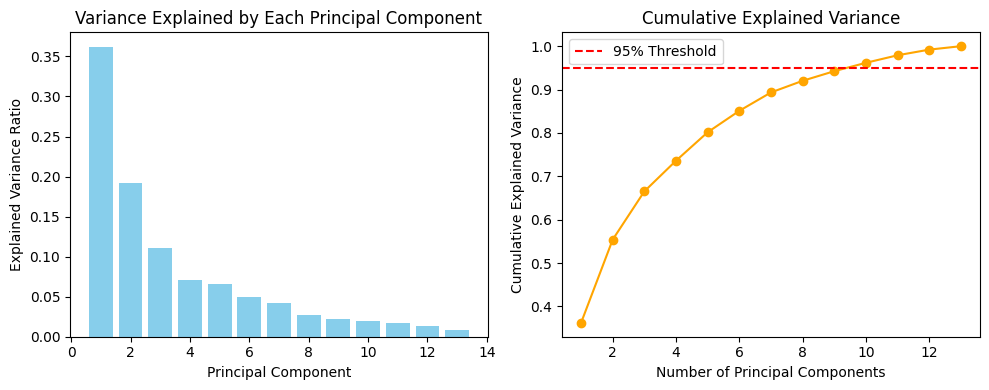

In [3]:
# Step 3️⃣: Apply PCA and Analyze Explained Variance

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Initialize PCA (no. of components not specified — we want to see all)
pca = PCA()

# Fit PCA to the scaled data
pca.fit(X_scaled)

# Get explained variance ratio for each principal component
explained_variance = pca.explained_variance_ratio_

# Display how much variance each component captures
print("Explained Variance Ratio for each Principal Component:\n")
for i, var in enumerate(explained_variance, start=1):
    print(f"PC{i}: {var:.4f}")

# Compute cumulative variance
cumulative_variance = np.cumsum(explained_variance)

# Print cumulative explained variance
print("\nCumulative Explained Variance:\n")
for i, cum_var in enumerate(cumulative_variance, start=1):
    print(f"PC1 to PC{i}: {cum_var:.4f}")

# Plot explained variance ratio
plt.figure(figsize=(10,4))

# Bar plot for individual variance ratio
plt.subplot(1, 2, 1)
plt.bar(range(1, len(explained_variance) + 1), explained_variance, color='skyblue')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Variance Explained by Each Principal Component')

# Line plot for cumulative explained variance
plt.subplot(1, 2, 2)
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', color='orange')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Threshold')
plt.legend()
plt.tight_layout()
plt.show()


In [4]:
# Step 4️⃣: Retain Top Components using PCA

from sklearn.decomposition import PCA

# 1️⃣ Reduce to 2 components for visualization
pca_2 = PCA(n_components=2)
X_pca2 = pca_2.fit_transform(X_scaled)

print("Explained variance ratio (2 components):", np.round(pca_2.explained_variance_ratio_, 4))
print("Total variance explained by 2 components:", np.round(sum(pca_2.explained_variance_ratio_), 4))

# 2️⃣ Reduce to capture 95% of variance
pca_95 = PCA(n_components=0.95)
X_pca95 = pca_95.fit_transform(X_scaled)

print("\nNumber of components needed to retain 95% variance:", pca_95.n_components_)
print("Explained variance ratio (selected components):", np.round(pca_95.explained_variance_ratio_, 4))
print("Cumulative variance explained:", np.round(sum(pca_95.explained_variance_ratio_), 4))


Explained variance ratio (2 components): [0.362  0.1921]
Total variance explained by 2 components: 0.5541

Number of components needed to retain 95% variance: 10
Explained variance ratio (selected components): [0.362  0.1921 0.1112 0.0707 0.0656 0.0494 0.0424 0.0268 0.0222 0.0193]
Cumulative variance explained: 0.9617


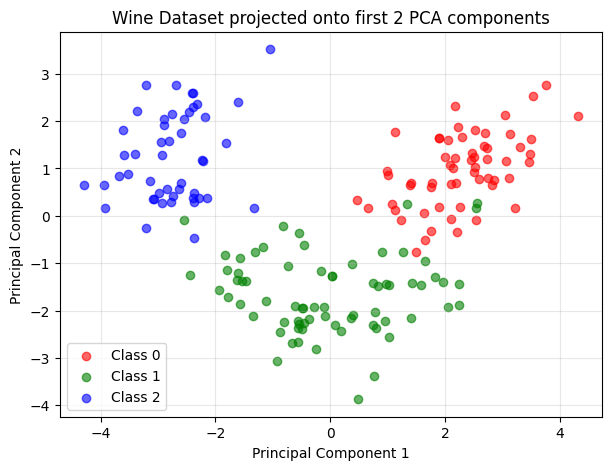

In [5]:
# Step 5️⃣: Visualize Data in 2D using PCA Components

import matplotlib.pyplot as plt
import numpy as np

# Define target names and colors
colors = ['red', 'green', 'blue']
target_names = ['Class 0', 'Class 1', 'Class 2']

# Create scatter plot
plt.figure(figsize=(7,5))
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_pca2[y == i, 0], X_pca2[y == i, 1],
                color=color, alpha=0.6, label=target_name)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Wine Dataset projected onto first 2 PCA components')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


In [6]:
# Step 6️⃣: Train Classifier on Original vs PCA-Reduced Data and Compare

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd

# Function to train and evaluate Logistic Regression
def train_and_evaluate(X_data, y_data, description):
    # Split data into train and test
    X_train, X_test, y_train, y_test = train_test_split(
        X_data, y_data, test_size=0.2, random_state=42, stratify=y_data)

    # Create and train logistic regression model
    model = LogisticRegression(max_iter=2000)
    model.fit(X_train, y_train)

    # Predict and evaluate
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)

    print(f"\n🔹 Accuracy using {description}: {acc:.4f}")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    return acc

# Train on Original Scaled Data
acc_original = train_and_evaluate(X_scaled, y, "Original Scaled Data")

# Train on PCA Reduced Data (95% variance)
acc_pca95 = train_and_evaluate(X_pca95, y, "PCA (95% variance retained)")

# Train on PCA (2 Components)
acc_pca2 = train_and_evaluate(X_pca2, y, "PCA (2 components)")

# Compare results
comparison = pd.DataFrame({
    'Data Type': ['Original (Scaled)', 'PCA (95% Variance)', 'PCA (2 Components)'],
    'Accuracy': [acc_original, acc_pca95, acc_pca2]
})

print("\n📊 Accuracy Comparison:\n", comparison)



🔹 Accuracy using Original Scaled Data: 0.9722
Confusion Matrix:
 [[12  0  0]
 [ 0 14  0]
 [ 0  1  9]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.93      1.00      0.97        14
           2       1.00      0.90      0.95        10

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36


🔹 Accuracy using PCA (95% variance retained): 0.9722
Confusion Matrix:
 [[12  0  0]
 [ 0 14  0]
 [ 0  1  9]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.93      1.00      0.97        14
           2       1.00      0.90      0.95        10

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.97        36
weighted avg       0.97      0.9